In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
from glob import glob
import os

In [73]:
#get any csv
path = os.getcwd()
csv_files = glob(os.path.join(path, "RUN*.csv"))
csv_files

['/home/givaldo/avlogger/AV3/RUN3.csv']

In [74]:
#read any csv

df = pd.read_csv(csv_files[0])
tabela1 = df.set_index('f1')
tabela2 = df.set_index('f2')
f1=tabela1.index.values
f2=tabela2.index.values
df

,lsmaccx,lsmaccy,lsmaccz,lsmangx,lsmangy,lsmangz,a0,a1,a2,f1,f2,timestamp
0,9094,3243,-9691,358,4515,-512,475,1504,2372,0,0,10
1,3619,25896,-3832,-224,-3041,-1331,1368,1757,2420,0,1,20
2,6392,22104,-1551,1674,-287,424,1396,1787,2462,0,0,30
3,10366,10384,-9258,968,1895,-1548,1409,1789,2463,0,0,40
4,1687,13084,-10696,-914,-4878,-1564,1412,1792,2467,0,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
554,-32764,13277,11521,-5435,-3635,5678,1430,1806,2452,0,2,5845
555,32716,16363,-402,-1992,-1055,-13799,1428,1810,2464,0,0,5855
556,-31740,-13203,-7918,7712,-17001,1597,1437,1809,2460,0,1,5865
557,-13483,14840,17219,992,2592,-8470,1433,1801,2429,1,5,5875


In [75]:
#depende do tamanho do arquivo esse números ainda tenho que automatizar. Então basicamente tu tem que mudar eles.

vel_bruto =[]
rot_bruto = []
rel=[]
cont = 0
for i in range(int(len(f1)/10)):
    rot_bruto.append(sum(f1[i*10:i*10+10]))
    vel_bruto.append(sum(f2[i*10:i*10+10]))

raio = 0.29 #em milímetros
furos_do_disco_de_freio = 24 

rot = [j * 20 * 60 for j in rot_bruto]
vel = [i * 2* raio * 3.1415 * 20 * 3.6 / furos_do_disco_de_freio for i in vel_bruto]
#vel = [i * 0.584 * 3.1415 * 20 * 3.6 / 24 for i in vel_bruto]

print(rot)
print(vel)

# raio: 290mm sem carga (2021)
# 15 furos (antes) -> 24 furos (agora)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1200, 0, 0, 0, 0, 0, 0, 0, 0, 2400, 3600, 3600, 7200, 3600, 4800, 8400, 2400, 1200, 1200, 0, 0, 4800, 6000, 7200, 7200, 8400, 8400, 8400, 4800]
[13.665525, 13.665525, 10.93242, 8.199315, 8.199315, 8.199315, 10.93242, 8.199315, 10.93242, 8.199315, 8.199315, 10.93242, 10.93242, 8.199315, 16.39863, 5.46621, 13.665525, 10.93242, 10.93242, 10.93242, 8.199315, 13.665525, 16.39863, 19.131735, 19.131735, 19.131735, 16.39863, 16.39863, 21.86484, 13.665525, 16.39863, 24.597945, 16.39863, 19.131735, 24.597945, 19.131735, 19.131735, 16.39863, 16.39863, 19.131735, 19.131735, 13.665525, 21.86484, 16.39863, 16.39863, 21.86484, 13.665525, 19.131735, 19.131735, 21.86484, 24.597945, 19.131735, 13.665525, 24.597945, 21.86484]


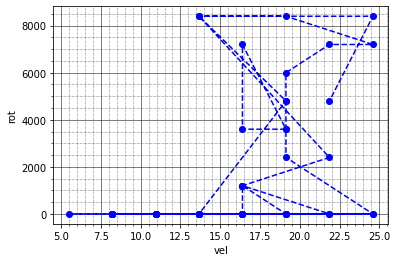

In [76]:
plt.plot(vel, rot, marker='o', linestyle='--', color='b') 
plt.xlabel('vel')
plt.ylabel('rot')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

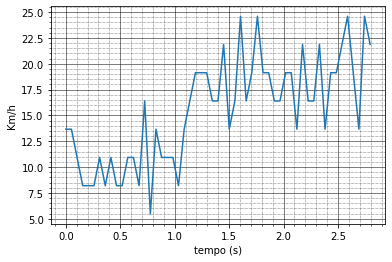

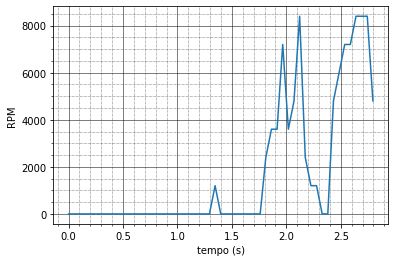

In [77]:
t = np.linspace(0, 0.05*len(f1)/10, int(len(f1)/10))

plt.plot(t,vel)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('Km/h')
plt.show()


plt.plot(t,rot)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('RPM')
plt.show()

In [78]:
data = { 
'RPM': rot,
'vel': vel}

In [79]:
csv = pd.DataFrame(data, columns=['RPM','vel'])

In [80]:
csv.to_csv('AV1_data.csv')

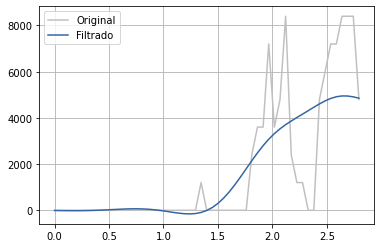

In [81]:
b, a = signal.butter(4, 0.10, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(b, a, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))


sig_rot = signal.filtfilt(b, a, rot)
plt.plot(t, rot, color='silver', label='Original')
plt.plot(t, sig_rot, color='#3465a4', label='Filtrado')
plt.grid(True, which='both')
plt.legend(loc="best")

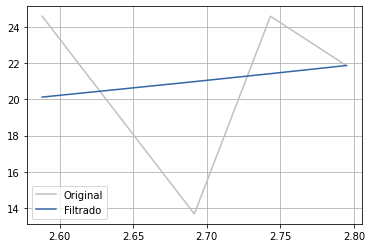

In [82]:
c, d = signal.butter(4, 0.15, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(c, d, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(c, d, signal.lfilter(c, d, impulse))


sig_vel = signal.filtfilt(c, d, vel)
plt.plot(t[50:340], vel[50:340], color='silver', label='Original')
plt.plot(t[50:340], sig_vel[50:340], color='#3465a4', label='Filtrado')
plt.grid(True, which='both')
plt.legend(loc="best")

In [83]:
sig_rot

array([-1.04050251e+01, -1.36910693e+01, -1.63486816e+01, -1.79172285e+01,
       -1.79340083e+01, -1.59850448e+01, -1.17640031e+01, -5.13480746e+00,
        3.80808252e+00,  1.46891775e+01,  2.68196431e+01,  3.91918583e+01,
        5.05089689e+01,  5.92559579e+01,  6.38160163e+01,  6.26321456e+01,
        5.44090620e+01,  3.83448894e+01,  1.43762319e+01, -1.65854411e+01,
       -5.24529104e+01, -8.98277606e+01, -1.23961101e+02, -1.48839053e+02,
       -1.57416190e+02, -1.42011372e+02, -9.48683620e+01, -8.86639555e+00,
        1.21660958e+02,  3.00078123e+02,  5.26689510e+02,  7.98212722e+02,
        1.10762078e+03,  1.44445977e+03,  1.79569102e+03,  2.14702317e+03,
        2.48459368e+03,  2.79675069e+03,  3.07561173e+03,  3.31806980e+03,
        3.52599391e+03,  3.70551513e+03,  3.86546869e+03,  4.01524880e+03,
        4.16250100e+03,  4.31117699e+03,  4.46044624e+03,  4.60477685e+03,
        4.73520872e+03,  4.84153104e+03,  4.91484141e+03,  4.94987466e+03,
        4.94655470e+03,  

In [84]:
sig_vel

array([13.71438276, 12.37991651, 11.15583903, 10.1372264 ,  9.38734434,
        8.93031353,  8.75128039,  8.80350351,  9.01988473,  9.32588821,
        9.65158523,  9.94180851, 10.16405099, 10.31350651, 10.41412276,
       10.51451241, 10.67837732, 10.97050962, 11.44085291, 12.11010764,
       12.96088625, 13.93808375, 14.96004919, 15.93825082, 16.79917747,
       17.50075605, 18.03774749, 18.43520014, 18.73354006, 18.9712651 ,
       19.17118034, 19.33438009, 19.44330044, 19.47188697, 19.39861074,
       19.21750371, 18.94338641, 18.60981823, 18.26139007, 17.94409192,
       17.6973023 , 17.54908254, 17.51464403, 17.59701215, 17.78880731,
       18.07436487, 18.4320161 , 18.83694909, 19.26516546, 19.69824607,
       20.12719366, 20.55290325, 20.98225145, 21.42181197, 21.87307068])

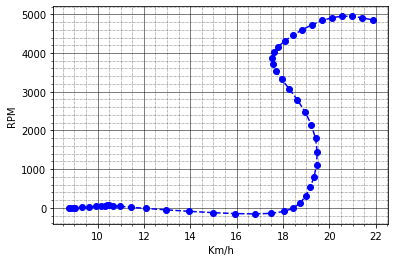

In [85]:
plt.plot(sig_vel[5:350], sig_rot[5:350], marker='o', linestyle='--', color='b') 
plt.xlabel('Km/h')
plt.ylabel('RPM')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Vel x Rot.jpeg')
plt.show()

In [86]:
data = { 
'RPM': sig_rot,
'vel': sig_vel}
csv = pd.DataFrame(data, columns=['RPM','vel'])
csv.to_csv('AV1_filt.csv')

In [87]:
tabela3 = df.set_index('lsmaccx')
tabela4 = df.set_index('lsmaccy')
tabela5 = df.set_index('lsmaccz')

accx=tabela3.index.values *0.00036
accy=tabela4.index.values *0.00036
accz=tabela5.index.values *0.00036

t1 = np.linspace(0, 0.005*len(f1), len(f1))


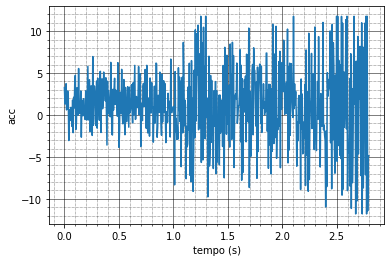

In [88]:
plt.plot(t1,accx)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

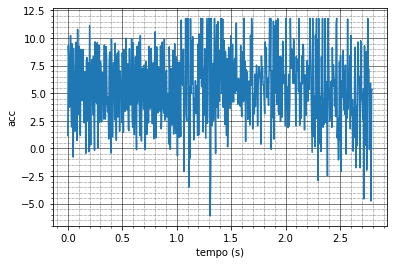

In [89]:
plt.plot(t1,accy)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

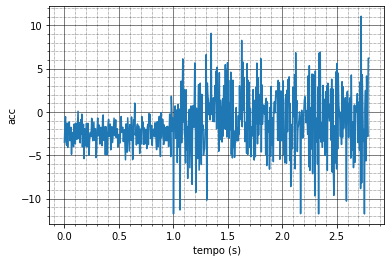

In [90]:
plt.plot(t1,accz)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

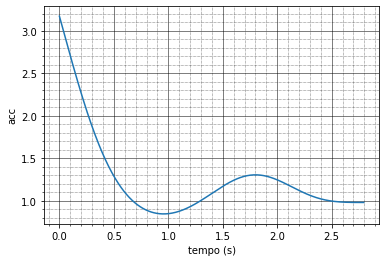

In [91]:
e, f = signal.butter(4, 0.007, analog=False)


sig_accx = signal.filtfilt(e, f, accx)

plt.plot(t1,sig_accx)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

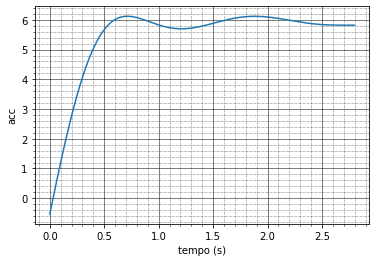

In [92]:
sig_accy = signal.filtfilt(e, f, accy)


plt.plot(t1,sig_accy)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

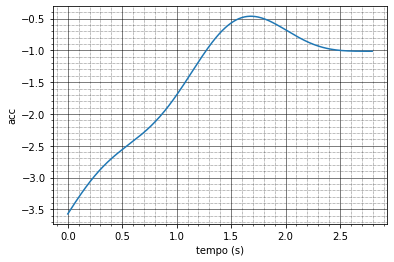

In [93]:
sig_accz = signal.filtfilt(e, f, accz)


plt.plot(t1,sig_accz)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

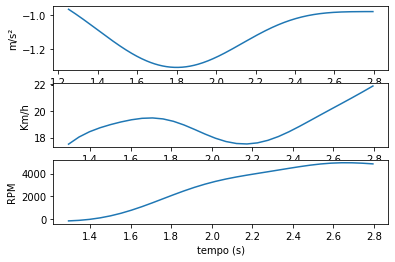

In [94]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')


plt.subplot(312)
plt.plot(t[25:], sig_vel[25:])
plt.xlabel('tempo (s)')
plt.ylabel('Km/h')


plt.subplot(313)
plt.plot(t[25:], sig_rot[25:])
plt.xlabel('tempo (s)')
plt.ylabel('RPM')

plt.savefig('Gráfico.png')

plt.show()

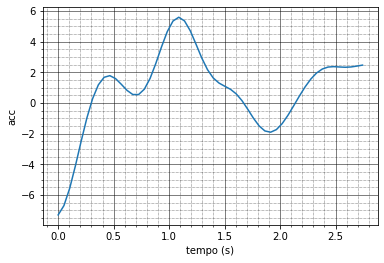

In [95]:
t2 = np.linspace(1, len(sig_vel), len(sig_vel))
t2 = [int(k) for k in t2]

accxn = [-1*(sig_vel[k-1]-sig_vel[k])/(0.05*3.66) for k in t2[:-1]]


plt.plot(t[:-1],accxn)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

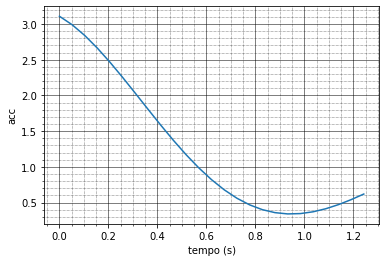

In [96]:
g, h = signal.butter(4, 0.05, analog=False)

sig_accxn = signal.filtfilt(g, h, accxn)


plt.plot(t[:-30],sig_accxn[22:-7])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('acc')
plt.show()

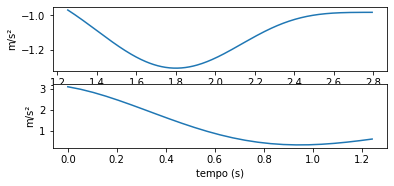

In [97]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')


plt.subplot(312)
plt.plot(t[:-30],sig_accxn[22:-7])
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')

plt.savefig('aceleração X.png')

plt.show()

In [98]:
print(max(sig_accx, key=int))
print(max(sig_accxn, key=int))

sig_accz = [k + 5 for k in sig_accz]

print(max(sig_vel, key=int))



3.1732742473498967
3.0277245627887743
21.421811967896588


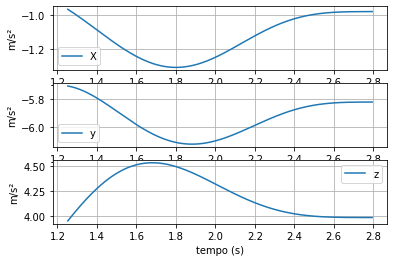

In [99]:
plt.figure()

plt.subplot(311)
plt.plot(t1[250:], -1*sig_accx[250:], label='X')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")


plt.subplot(312)
plt.plot(t1[250:], -1*sig_accy[250:], label='y')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")


plt.subplot(313)
plt.plot(t1[250:], sig_accz[250:], label='z')
plt.xlabel('tempo (s)')
plt.ylabel('m/s²')
plt.grid(True, which='both')
plt.legend(loc="best")

plt.savefig('aceleração.jpeg')

plt.show()

In [100]:
t_motor = [j * 20 for j in rot_bruto]
t_roda = [i * 20/15 for i in vel_bruto]

sig_t_motor = signal.filtfilt(c, d, t_motor)
sig_t_roda = signal.filtfilt(c, d, t_roda)


relacao = [sig_t_motor[i-1]/sig_t_roda[i-1] for i in t2]

sig_relacao = signal.filtfilt(c, d, relacao)


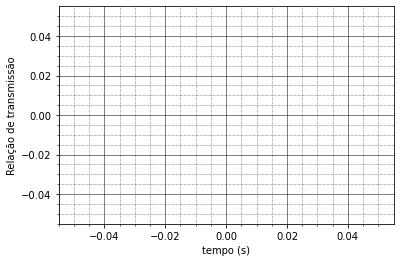

In [101]:
plt.plot(t[69:340],relacao[69:340])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('tempo (s)')
plt.ylabel('Relação de transmissão')

plt.savefig('Relação de transmissão.jpeg')

plt.show()

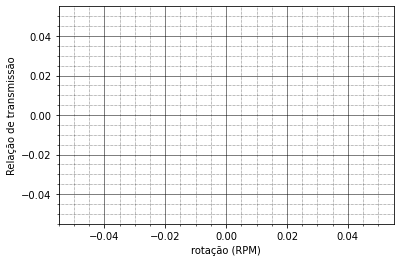

In [102]:
relacaocvt = [relacao[i]/8 for i in t2[:-1]]

plt.plot(sig_rot[69:340],relacaocvt[69:340])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('rotação (RPM)')
plt.ylabel('Relação de transmissão')

plt.savefig('Relação de transmissão com retas 27do11 peso 50 mola preta rampa gaged pre-carga 10mm')

plt.show()

best fit line:
y = 0.00 + 290.30x


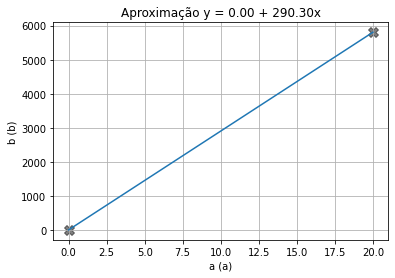

In [103]:

X = [0, 20]
Y = [0, 5806]


def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(X, Y)
#best fit line:


# plot points and fit line  
plt.scatter(X, Y, 100, c="black", alpha=0.5, marker="X")
yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)
plt.grid(True)
plt.xlabel("a (a)")
plt.ylabel("b (b)")
plt.title('Aproximação y = {:.2f} + {:.2f}x'.format(a, b))
plt.show()




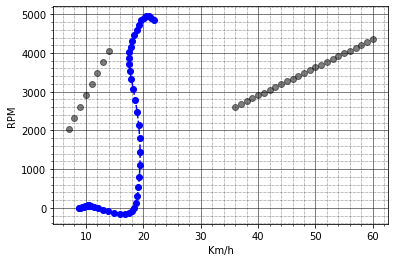

In [104]:
m = np.linspace(1, 100, 100)
reta = [m[i]*290.3 for i,k in enumerate(m)]
reta2 = [m[i]*290.3/4 for i,k in enumerate(m)]

plt.scatter(m[6:-86], reta[6:-86], c="black", alpha=0.5)
plt.scatter(m[35:-40], reta2[35:-40], c="black", alpha=0.5)
plt.plot(sig_vel[5:350], sig_rot[5:350], marker='o', linestyle='--', color='b') 
plt.xlabel('Km/h')
plt.ylabel('RPM')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('Vel x Rot com retas.jpeg')

plt.show()

In [105]:
s = [sum(sig_vel[:k])*0.05/(3.66) for k in t2[:-1]]
RPM = [x for x in sig_rot]
index30 = s.index(30.051547889583183)
index0 = s.index(0.3640648617505487)
index3500 = RPM.index( 3565.2005304671175)
print(sig_vel[index30],sig_rot[index30], t[index30] - t[index0], t[index3500] - t[index0])

ValueError: 30.051547889583183 is not in list

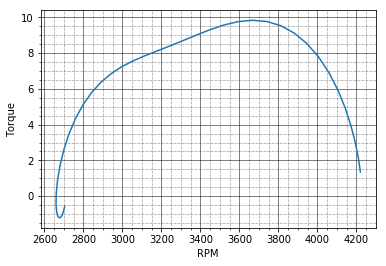

984 984


In [ ]:
x, z = signal.butter(4, 0.1, analog=False)


sig_rotT = signal.filtfilt(x, z, rot)
sig_rotT = [x for x in sig_rotT]

torque = [(sig_rotT[k-1]-sig_rotT[k])/7.6 for k in t2[:-1]]
del sig_rotT[-1]


plt.plot(sig_rotT[310:350],torque[310:350])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('RPM')
plt.ylabel('Torque')
plt.savefig('Torque.jpeg')

plt.show()

print(len(sig_rotT), len(torque))